<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("/content/delivery_time.csv")

In [ ]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Delivery Time                   21 non-null     float64
 1   Sorting Time                    21 non-null     int64  
 2   Actual time taken for delivery  21 non-null     float64
 3   Speed of the Delivery           21 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 800.0 bytes


In [ ]:
df['Actual time taken for delivery'] = df['Delivery Time'] - df['Sorting Time']
df['Speed of the Delivery'] = df['Delivery Time']/ df['Sorting Time']

In [ ]:
df.head()

,Delivery Time,Sorting Time,Actual time taken for delivery,Speed of the Delivery
0,21.00,10,11.00,2.100000
1,13.50,4,9.50,3.375000
2,19.75,6,13.75,3.291667
3,24.00,9,15.00,2.666667
4,29.00,10,19.00,2.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Delivery Time                   21 non-null     float64
 1   Sorting Time                    21 non-null     int64  
 2   Actual time taken for delivery  21 non-null     float64
 3   Speed of the Delivery           21 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 800.0 bytes


#DESCRIPTIVE ANALYSIS


In [ ]:
df.describe()

,Delivery Time,Sorting Time,Actual time taken for delivery,Speed of the Delivery
count,21.000000,21.000000,21.000000,21.000000
mean,16.790952,6.190476,10.600476,2.927826
std,5.074901,2.542028,3.302258,0.714378
min,8.000000,2.000000,6.000000,1.790000
25%,13.500000,4.000000,8.500000,2.478750
50%,17.830000,6.000000,9.750000,2.687500
75%,19.750000,8.000000,11.830000,3.375000
max,29.000000,10.000000,19.000000,4.300000


For: Delivery Time


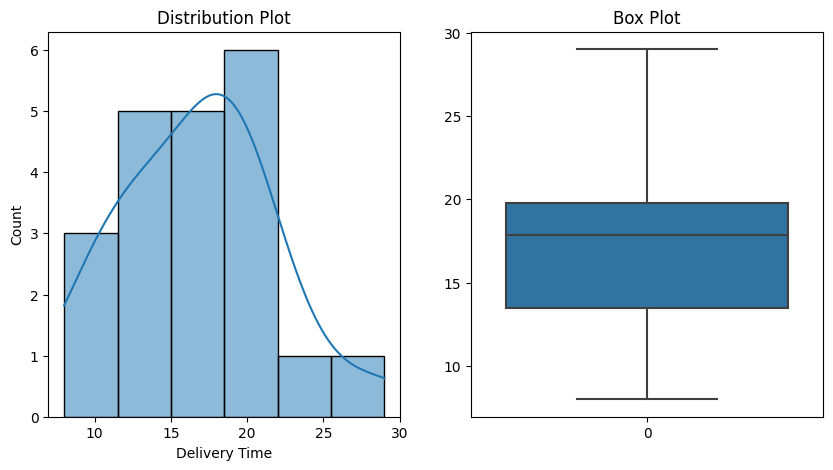

For: Sorting Time


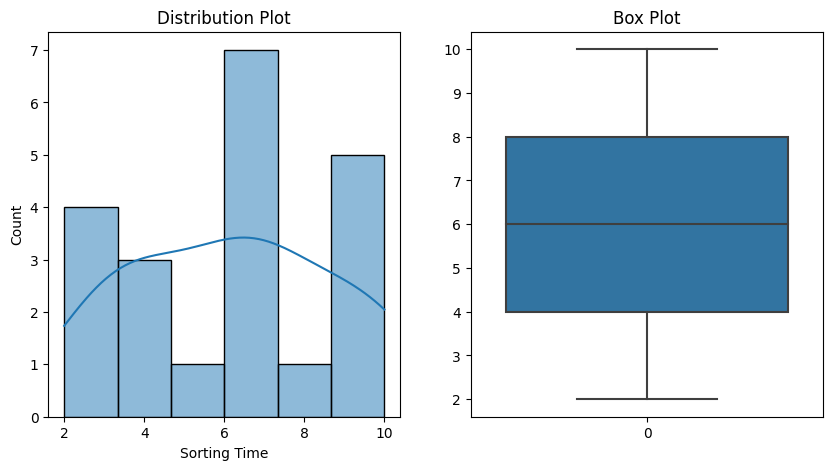

For: Actual time taken for delivery


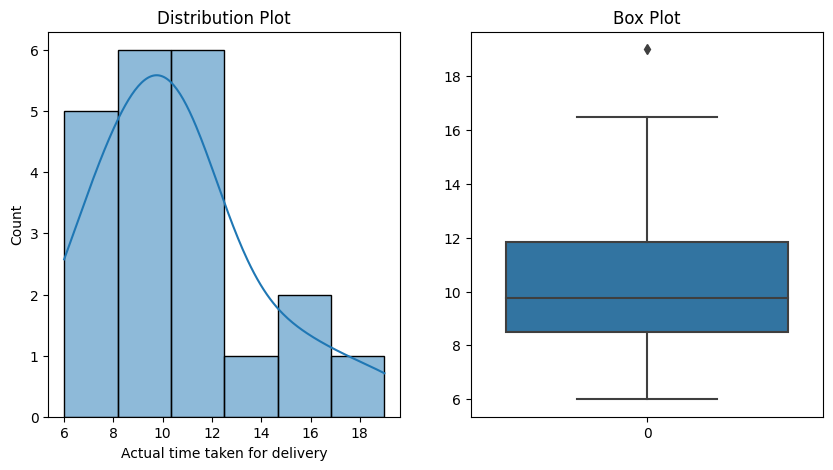

For: Speed of the Delivery


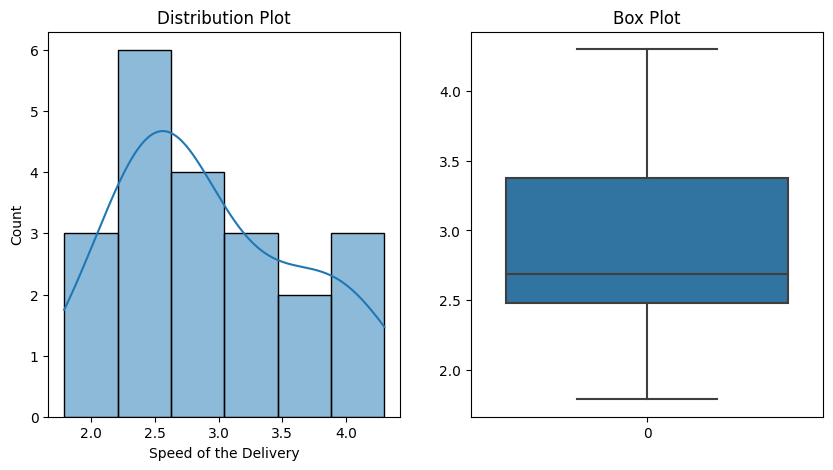

In [ ]:
for i in df.columns:
  print("For:", i)
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  sns.histplot(df[i], kde=True, ax=axes[0])
  axes[0].set_title('Distribution Plot')
  sns.boxplot(df[i], ax=axes[1])
  axes[1].set_title('Box Plot')
  plt.show()

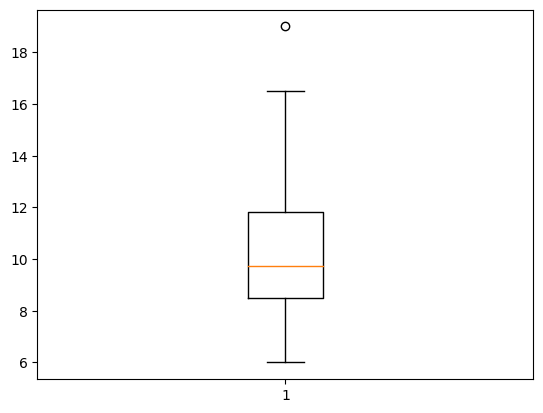

In [ ]:
box = plt.boxplot(df['Actual time taken for delivery'])

#TREATMENT OF OUTLIERS

In [ ]:
Q3 = df['Actual time taken for delivery'].quantile(q=0.75)
Q1 = df['Actual time taken for delivery'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


3.3299999999999983


In [ ]:
import numpy as np
def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df, down, up)
print(a)

    Delivery Time  Sorting Time  Actual time taken for delivery  \
0          16.825        10.000                          11.000   
1          13.500         4.000                           9.500   
2          16.825         6.000                          13.750   
3          16.825         9.000                          15.000   
4          16.825        10.000                          16.825   
5          15.350         6.000                           9.350   
6          16.825         7.000                          12.000   
7           9.500         3.505                           6.500   
8          16.825        10.000                           7.900   
9          16.825         9.000                           9.750   
10         16.825         8.000                          11.830   
11         10.750         4.000                           6.750   
12         16.680         7.000                           9.680   
13         11.500         3.505                           8.50

In [ ]:
df=a

{'whiskers': [<matplotlib.lines.Line2D at 0x7a9431085090>,
 'caps': [<matplotlib.lines.Line2D at 0x7a9431085c30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a9431085180>],
 'medians': [<matplotlib.lines.Line2D at 0x7a9431087d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a9431085210>],
 'means': []}

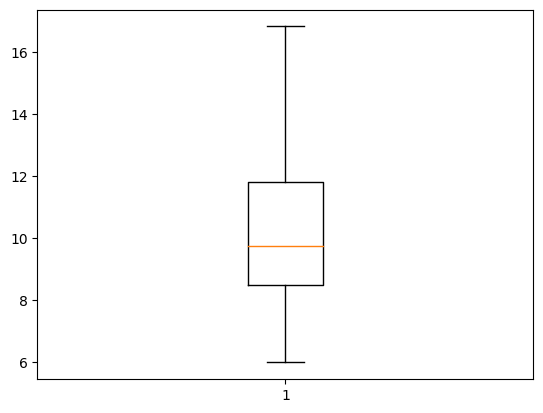

In [ ]:
plt.boxplot(df['Actual time taken for delivery'])

BIVARIATE ANALYSIS

<Figure size 400x1200 with 0 Axes>

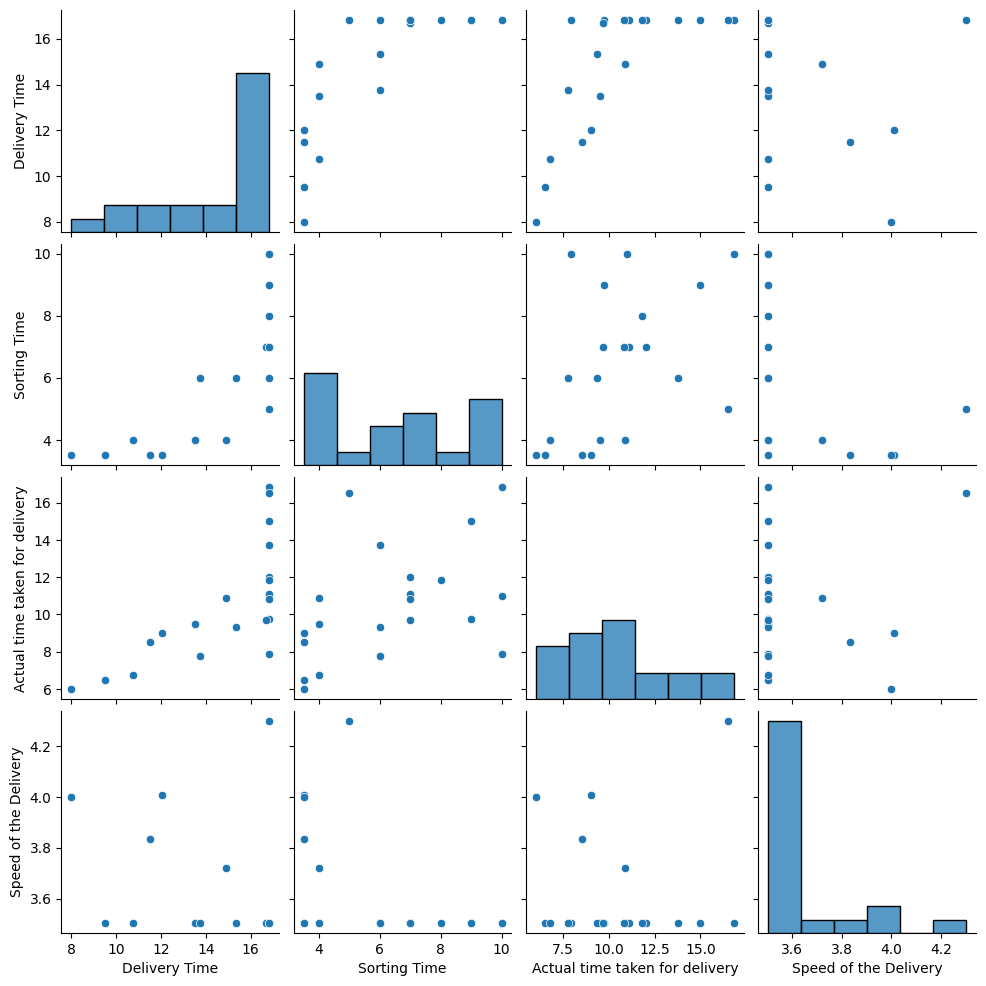

In [ ]:
plt.figure(figsize=(4,12))
sns.pairplot(df)
plt.show()

<Axes: >

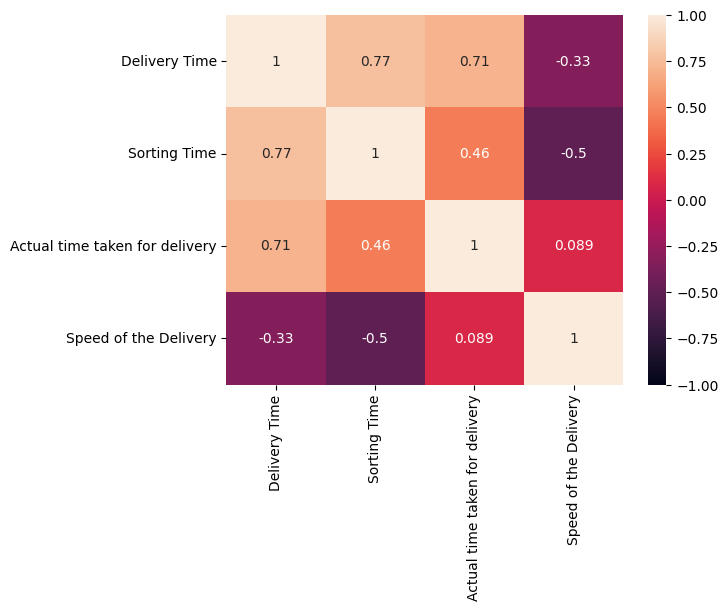

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
X = df.drop('Delivery Time', axis=1)
Y = df['Delivery Time']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [ ]:
sc= StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_Scaled, Y_train)

LinearRegression()

In [ ]:
model.score(X_train_Scaled, Y_train)

0.7479985227741635

In [ ]:
model.score(X_test_Scaled, Y_test)

0.6979205698782474

In [ ]:
y_pred_train = model.predict(X_train_Scaled)
y_pred_test = model.predict(X_test_Scaled)

In [ ]:
y_pred_train

array([19.6019337 , 15.75390399, 15.85514926, 11.53153887, 12.90291451,
       12.4038851 , 17.61128772, 16.45169735, 15.45531136, 16.48481705,
       16.55188815, 15.06230829, 11.96312457, 14.25024008])

In [ ]:
print(r2_score(Y_train, y_pred_train))
print(r2_score(Y_test, y_pred_test))

0.7479985227741635
0.6979205698782474


In [ ]:
print(mean_squared_error(Y_train, y_pred_train))
print(mean_squared_error(Y_test, y_pred_test))

1.848188406517799e-29
9.917108522778434e-30


In [ ]:
coeff = model.coef_

In [ ]:
coeff

array([ 2.44218871e+00,  3.42941812e+00, -4.44089210e-16])

In [ ]:
for i, coefficient in enumerate(coeff):
  print(f"Coefficient for feature {i}: {coefficient}")


Coefficient for feature 0: 2.4421887138969667
Coefficient for feature 1: 3.4294181246195925
Coefficient for feature 2: -4.440892098500626e-16


In [ ]:
lasso = Lasso(alpha=0.09)
lasso.fit(X_train_Scaled, Y_train)

Lasso(alpha=0.09)

In [ ]:
lasso.score(X_train_Scaled, Y_train)

0.7447838860879201

In [ ]:
lasso.score(X_test_Scaled, Y_test)

0.7147650792468214

In [ ]:
ridge = Ridge(alpha=0.09)
ridge.fit(X_train_Scaled, Y_train)
ridge.score(X_train_Scaled, Y_train)

0.7479788074025562

In [ ]:
ridge.score(X_test_Scaled, Y_test)

0.697515645115071

In [ ]:
results = pd.DataFrame(dtype='int', columns=[['Train_Accuracy', 'Test_Accuracy']], index=['Linear Regression', 'Ridge', 'Lasso'])

In [ ]:
results

,Train_Accuracy,Test_Accuracy
Linear Regression,NaN,NaN
Ridge,NaN,NaN
Lasso,NaN,NaN


In [ ]:
results['Train_Accuracy'] = [0.7479985227741635,0.7447838860879201, 0.7479788074025562]

In [ ]:
results

,Train_Accuracy,Test_Accuracy
Linear Regression,0.747999,NaN
Ridge,0.744784,NaN
Lasso,0.747979,NaN


In [ ]:
results['Test_Accuracy'] = [0.6979205698782474,0.7147650792468214, 0.697515645115071]

In [ ]:
results

,Train_Accuracy,Test_Accuracy
Linear Regression,0.747999,0.697921
Ridge,0.744784,0.714765
Lasso,0.747979,0.697516


#NEXT DATASET

In [ ]:
a = pd.read_csv("/content/Salary_Data.csv")

In [ ]:
a.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#FEATURE ENGINEERING

In [ ]:
a['CareerStage'] = pd.NA

In [ ]:
a.head()

,YearsExperience,Salary,CareerStage
0,1.1,39343.0,<NA>
1,1.3,46205.0,<NA>
2,1.5,37731.0,<NA>
3,2.0,43525.0,<NA>
4,2.2,39891.0,<NA>


In [ ]:
a.loc[a['YearsExperience']<5, 'CareerStage'] = 'Entry'
a.loc[(a['YearsExperience']>=5) & (a['YearsExperience']<10), 'CareerStage'] = 'Mid-Level'
a.loc[a['YearsExperience']>10, 'CareerStage'] = 'Senior-Level'

In [ ]:
a.head()

,YearsExperience,Salary,CareerStage
0,1.1,39343.0,Entry
1,1.3,46205.0,Entry
2,1.5,37731.0,Entry
3,2.0,43525.0,Entry
4,2.2,39891.0,Entry


In [ ]:
a['CareerStage'].value_counts()

Entry           16
Mid-Level       12
Senior-Level     2
Name: CareerStage, dtype: int64

In [ ]:
a.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#UNIVARIATE ANALYSIS

For: YearsExperience


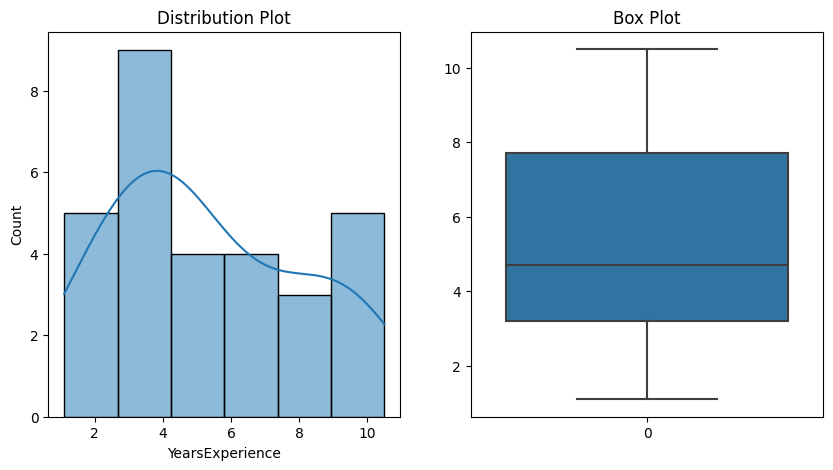

For: Salary


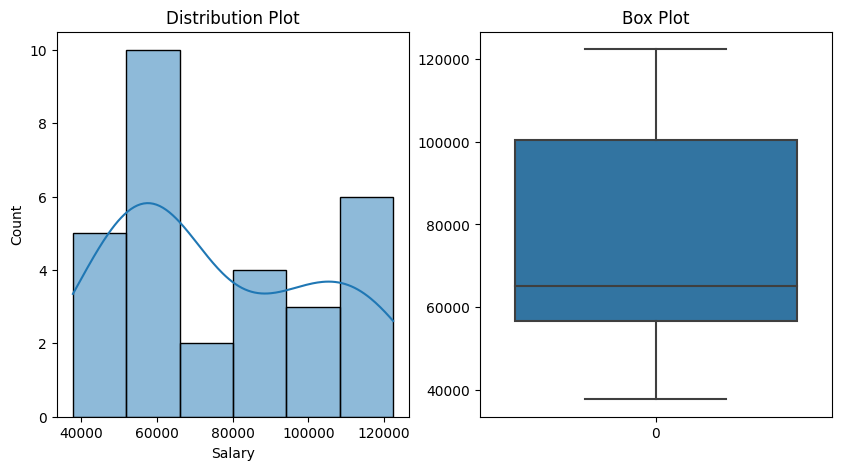

For: CareerStage


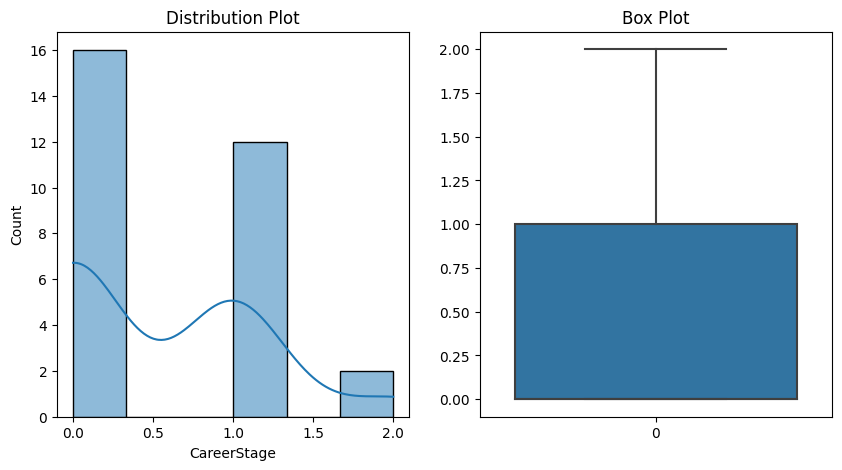

In [ ]:
for i in a.columns:
  print("For:", i)
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  sns.histplot(a[i], kde=True, ax=axes[0])
  axes[0].set_title('Distribution Plot')
  sns.boxplot(a[i], ax=axes[1])
  axes[1].set_title('Box Plot')
  plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
a.iloc[:, -1] = label.fit_transform(a.iloc[:,-1])

<ipython-input-18-859d102351fd>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  a.iloc[:, -1] = label.fit_transform(a.iloc[:,-1])


#BIVARIATE ANALYSIS

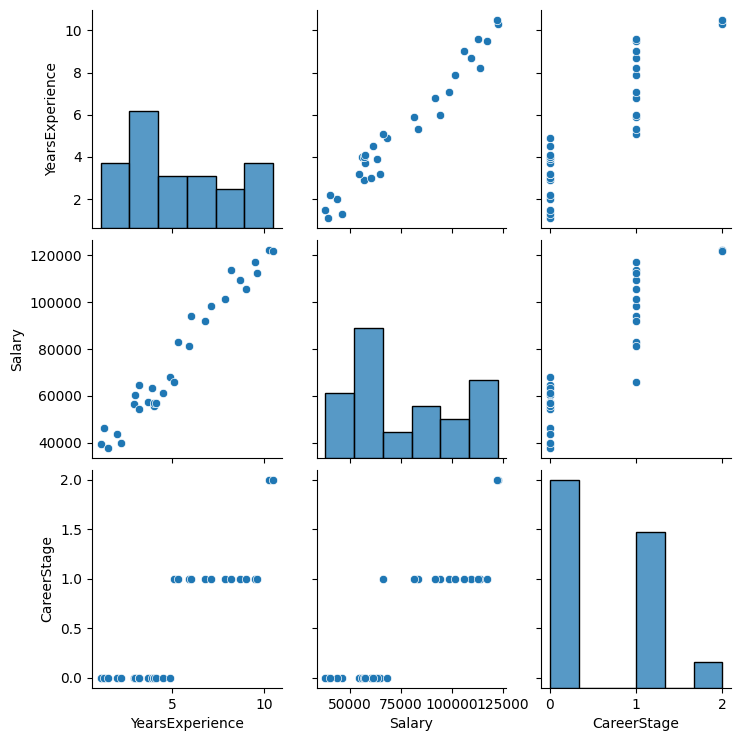

In [ ]:
sns.pairplot(a)

<Axes: >

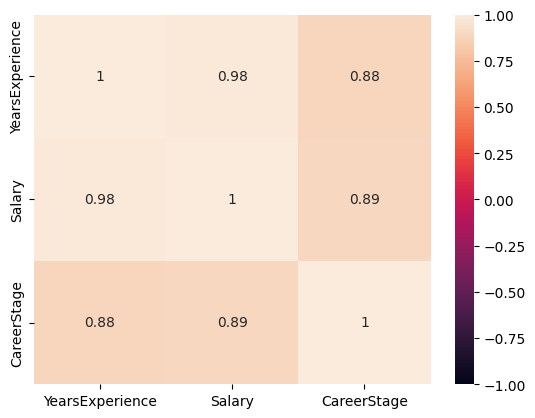

In [ ]:
sns.heatmap(a.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
a['CareerStage'].value_counts()

0    16
1    12
2     2
Name: CareerStage, dtype: int64

#MODEL BUILDING


In [ ]:
X = a.drop('Salary', axis=1)
Y = a['Salary']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [ ]:
X_test.shape

(10, 2)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.9566337678067898

In [ ]:
model.score(X_test, Y_test)

0.9558978466909751

In [ ]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, Y_train)

Lasso()

In [ ]:
lasso.score(X_train, Y_train)

0.9566337522957189

In [ ]:
lasso.score(X_test, Y_test)

0.9559021984443491

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, Y_train)

0.9566262265707384

In [ ]:
ridge.score(X_test, Y_test)

0.9561142079214497

In [ ]:
result = pd.DataFrame(dtype='int', columns=[['Train_Accuracy', 'Test_Accuracy']], index=['Linear Regression', 'Ridge', 'Lasso'])

In [ ]:
result

,Train_Accuracy,Test_Accuracy
Linear Regression,NaN,NaN
Ridge,NaN,NaN
Lasso,NaN,NaN


In [ ]:
result['Train_Accuracy'] = [0.9566337678067898,0.9566337522957189,0.9566262265707384]
result['Test_Accuracy'] = [0.9558978466909751,0.9559021984443491,0.9561142079214497]

In [ ]:
result

,Train_Accuracy,Test_Accuracy
Linear Regression,0.956634,0.955898
Ridge,0.956634,0.955902
Lasso,0.956626,0.956114
